In [1]:
import respresso_new as respresso

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [4]:
respresso_obj = respresso.respresso_core()

Hello. This is RESPRESSO.
Load precomputed data files...
RESPRESSO ready.


In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline as ius

In [6]:
plin_target = np.loadtxt('../test_data/linear_power/plin_wmap5_z1.dat').T
plin_target_spl = ius(plin_target[0,],plin_target[1,])


In [7]:
plin_target.shape

(2, 2401)

In [8]:
respresso_obj.set_target(plin_target_spl)

In [9]:
respresso_obj.find_path()


number of intermediate steps: 0


In [11]:
kmax = respresso_obj.get_kmax()
print ('Rough estimate of the maximum wavenumber: k_max =', kmax, ' h/Mpc')

Rough estimate of the maximum wavenumber: k_max = 0.4238169059753417  h/Mpc


In [12]:
kwave = respresso_obj.get_kinternal()
pnl_rec = respresso_obj.reconstruct()


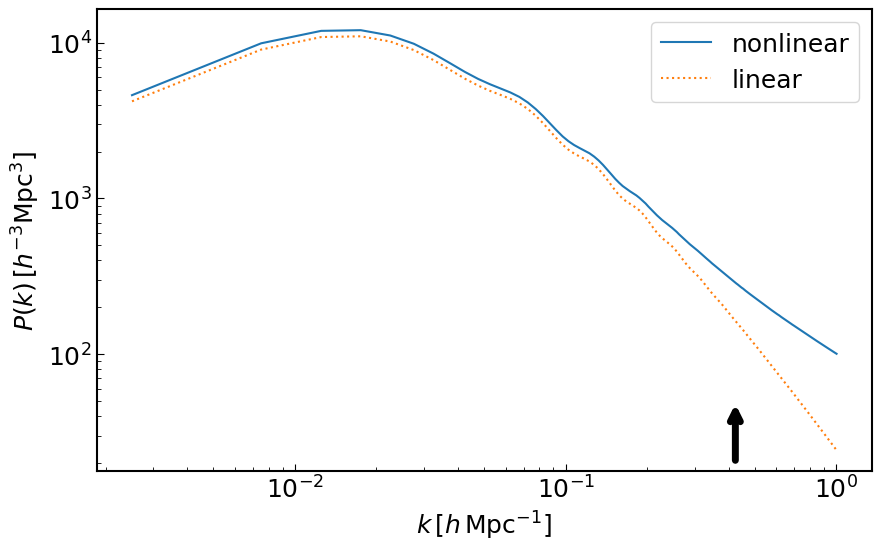

In [13]:
plt.figure(figsize=(10,6))
plt.loglog(kwave,pnl_rec,label='nonlinear')
plt.loglog(kwave,plin_target_spl(kwave),':',label='linear')
plt.annotate("", xy=(kmax, 50), xytext=(kmax, 20),arrowprops=dict(arrowstyle="->",lw=5))
plt.xlabel('$k\,[h\,\mathrm{Mpc}^{-1}]$')
plt.ylabel('$P(k)\,[h^{-3}\mathrm{Mpc}^{3}]$')
plt.legend()

In [14]:
z = 0.5
ascale = 1/(1+z)
Om, w = 0.279, -1
D2 = respresso.linearGrowth(ascale,Om,w)**2
plin_target = np.loadtxt('../test_data/linear_power/plin_wmap5_z0.dat').T
plin_target_spl = ius(plin_target[0,],D2*plin_target[1,])

number of intermediate steps: 0
Rough estimate of the maximum wavenumber: k_max = 0.3430296974182128  h/Mpc


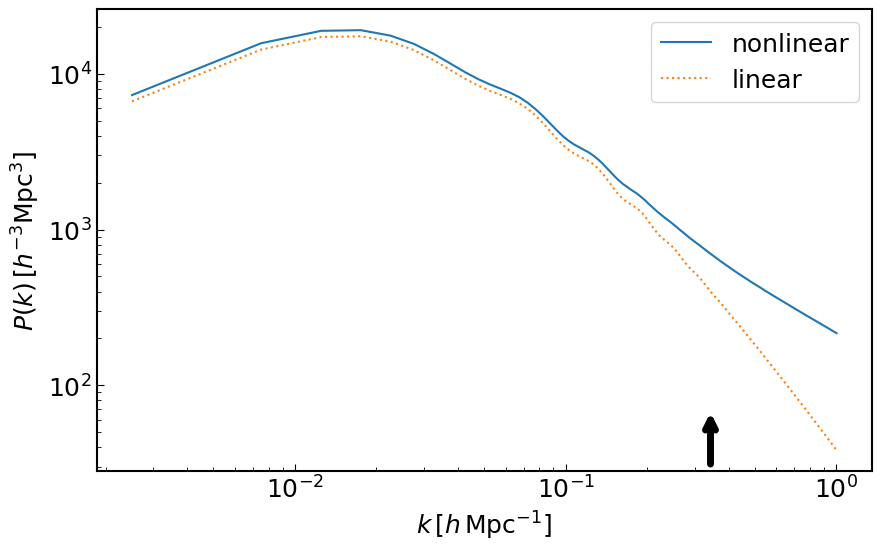

In [15]:
respresso_obj.set_target(plin_target_spl)
respresso_obj.find_path()
kmax = respresso_obj.get_kmax()
print ('Rough estimate of the maximum wavenumber: k_max =', kmax, ' h/Mpc')
kwave = respresso_obj.get_kinternal()
pnl_rec = respresso_obj.reconstruct()
plt.figure(figsize=(10,6))
plt.loglog(kwave,pnl_rec,label='nonlinear')
plt.loglog(kwave,plin_target_spl(kwave),':',label='linear')
plt.annotate("", xy=(kmax, 70), xytext=(kmax, 30),arrowprops=dict(arrowstyle="->",lw=5))
plt.xlabel('$k\,[h\,\mathrm{Mpc}^{-1}]$')
plt.ylabel('$P(k)\,[h^{-3}\mathrm{Mpc}^{3}]$')
plt.legend()


In [16]:
c1 = respresso.Cosmology(0.234,0.734,2.37301e-09,0.961,0.002,-1.,'../test_data/transfer/tkwmap3.dat') # Om0, hubble, As, ns, k0[1/Mpc], w and transfer table


In [17]:
z = 0.5
ks = np.logspace(-3,1,400)
plin_data = c1.get_plin(ks,z)
plin_spl = ius(ks,plin_data)


number of intermediate steps: 2
Rough estimate of the maximum wavenumber: k_max = 0.328077579498291  h/Mpc


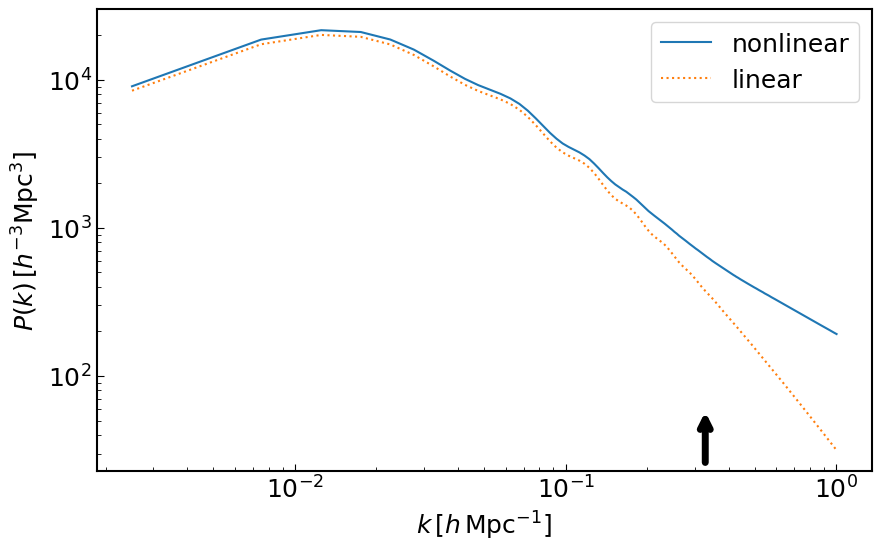

In [19]:
respresso_obj.set_target(plin_spl)
respresso_obj.find_path()
kmax = respresso_obj.get_kmax()
print ('Rough estimate of the maximum wavenumber: k_max =', kmax, ' h/Mpc')
kwave = respresso_obj.get_kinternal()
pnl_rec = respresso_obj.reconstruct()
plt.figure(figsize=(10,6))
plt.loglog(kwave,pnl_rec,label='nonlinear')
plt.loglog(kwave,plin_spl(kwave),':',label='linear')
plt.annotate("", xy=(kmax, 60), xytext=(kmax, 25),arrowprops=dict(arrowstyle="->",lw=5))
plt.xlabel('$k\,[h\,\mathrm{Mpc}^{-1}]$')
plt.ylabel('$P(k)\,[h^{-3}\mathrm{Mpc}^{3}]$')
plt.legend()

In [20]:
from classy import Class


In [21]:
cosmo = Class()
params = {'output': 'mPk','T_cmb': '2.7255','h': '0.7','Omega_b': '0.03','Omega_cdm': '0.12','tau_reio': '0.079','n_s': '0.96','ln10^{10}A_s': '3.','Omega_k': '0.0','k_pivot': '0.05','P_k_max_h/Mpc': '10.0','z_max_pk': '5'} 
cosmo.set(params)
cosmo.compute()

In [22]:
z = 1.
ks = np.logspace(-3,1,400)
plin_data = [cosmo.pk(ks[i]*cosmo.h(), z)*cosmo.h()**3 for i in range(400)]
plin_spl = ius(ks,plin_data)


number of intermediate steps: 4
Rough estimate of the maximum wavenumber: k_max = 0.4161882743835448  h/Mpc


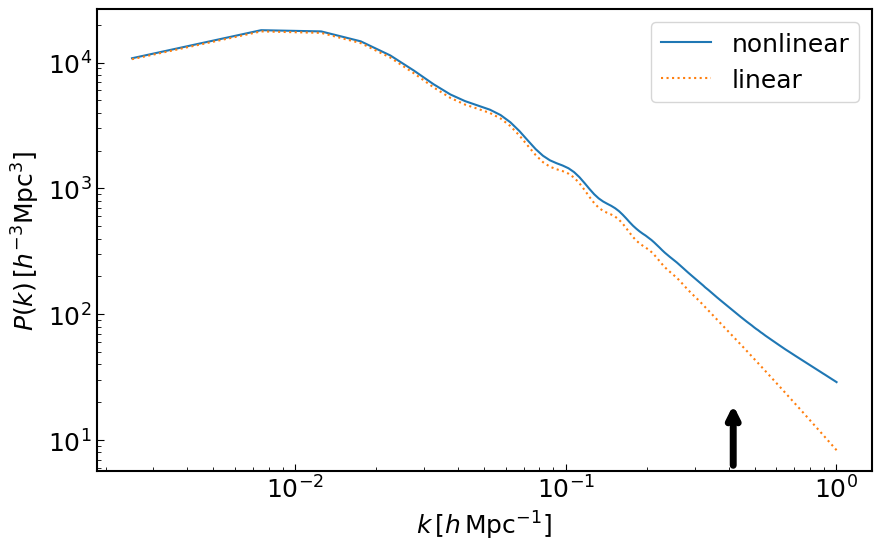

In [24]:
respresso_obj.set_target(plin_spl)
respresso_obj.find_path()
kmax = respresso_obj.get_kmax()
print ('Rough estimate of the maximum wavenumber: k_max =', kmax, ' h/Mpc')
kwave = respresso_obj.get_kinternal()
pnl_rec = respresso_obj.reconstruct()
plt.figure(figsize=(10,6))
plt.loglog(kwave,pnl_rec,label='nonlinear')
plt.loglog(kwave,plin_spl(kwave),':',label='linear')
plt.annotate("", xy=(kmax, 20), xytext=(kmax, 6),arrowprops=dict(arrowstyle="->",lw=5))
plt.xlabel('$k\,[h\,\mathrm{Mpc}^{-1}]$')
plt.ylabel('$P(k)\,[h^{-3}\mathrm{Mpc}^{3}]$')
plt.legend()
